In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import os
import fastparquet
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import fiona

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/5_Dataset_for_Exploration/Exploration_Tripdata_For_Map.parquet"
# Testing the Parquet Files
df=pd.read_parquet(path=path,engine="fastparquet")
df

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
0       2009-06-04 22:02:56 2009-06-04 22:11:56                2   
1       2009-06-06 22:02:00 2009-06-06 22:30:00                1   
2       2009-06-19 17:01:00 2009-06-19 17:09:00                3   
3       2009-01-18 19:47:30 2009-01-18 19:53:35                2   
4       2009-07-13 09:27:47 2009-07-13 09:39:49                1   
5       2009-09-15 18:12:00 2009-09-15 18:29:00                1   
6       2009-05-02 20:56:00 2009-05-02 21:06:00                1   
7       2009-02-14 05:55:48 2009-02-14 06:02:13                1   
8       2009-07-24 22:29:05 2009-07-24 22:49:13                1   
9       2009-03-18 09:21:59 2009-03-18 09:39:36                1   
10      2009-05-12 19:06:29 2009-05-12 19:12:06                4   
11      2009-10-06 08:35:34 2009-10-06 08:57:34                1   
13      2009-04-09 01:00:00 2009-04-09 01:08:00                1   
14      2009-04-23 08:04:00 2009-04-23 08:30:00                1   
15      2009-11-26 01:33:00 2009-11-26 01:40:00                3   
16      2009-05-04 20:44:00 2009-05-04 20:54:00                5   
17      2009-03-10 20:38:46 2009-03-10 20:47:22                2   
18      2009-01-09 12:33:00 2009-01-09 12:56:00                5   
19      2009-10-11 09:48:46 2009-10-11 09:50:27                1   
20      2009-06-04 09:44:00 2009-06-04 10:05:00                3   
21      2009-10-31 21:38:00 2009-10-31 21:53:00                2   
22      2009-06-21 17:29:58 2009-06-21 17:57:04                3   
23      2009-06-29 11:00:15 2009-06-29 11:04:12                1   
24      2009-11-04 13:09:00 2009-11-04 13:15:00                5   
25      2009-04-30 00:01:03 2009-04-30 00:11:37                2   
26      2009-05-15 17:26:00 2009-05-15 17:45:00                5   
27      2009-07-17 12:06:00 2009-07-17 12:27:00                2   
28      2009-03-16 00:51:00 2009-03-16 01:06:00                5   
30      2009-11-29 13:19:00 2009-11-29 13:34:00                1   
31      2009-10-10 18:46:53 2009-10-10 18:52:41                2   
...                     ...                 ...              ...   
1999969 2016-06-26 18:47:30 2016-06-26 18:55:31                1   
1999970 2016-06-17 08:35:28 2016-06-17 08:45:42                1   
1999971 2016-02-18 16:28:06 2016-02-18 16:34:29                1   
1999972 2016-03-17 10:02:07 2016-03-17 10:25:32                5   
1999973 2016-04-04 22:11:20 2016-04-04 22:27:14                1   
1999974 2016-06-12 09:52:49 2016-06-12 10:07:40                1   
1999975 2016-05-11 15:44:14 2016-05-11 16:43:19                1   
1999976 2016-05-26 14:28:46 2016-05-26 14:44:20                2   
1999977 2016-05-18 15:56:43 2016-05-18 16:10:12                2   
1999978 2016-02-23 21:24:56 2016-02-23 21:45:06                1   
1999979 2016-02-15 12:05:50 2016-02-15 12:09:16                1   
1999980 2016-01-12 15:18:13 2016-01-12 15:22:33                3   
1999981 2016-01-01 03:27:40 2016-01-01 03:41:49                5   
1999982 2016-03-13 09:47:03 2016-03-13 09:55:08                1   
1999983 2016-03-15 08:14:22 2016-03-15 08:33:29                1   
1999984 2016-05-10 20:04:14 2016-05-10 20:16:19                3   
1999985 2016-03-03 18:24:19 2016-03-03 19:04:39                5   
1999986 2016-06-02 16:52:58 2016-06-02 17:12:45                2   
1999987 2016-04-22 17:07:48 2016-04-22 17:28:01                4   
1999988 2016-03-16 11:44:29 2016-03-16 11:48:16                2   
1999989 2016-06-11 02:19:47 2016-06-11 02:25:16                1   
1999990 2016-04-27 19:27:42 2016-04-27 19:30:02                1   
1999991 2016-03-27 15:25:32 2016-03-27 15:32:15                1   
1999992 2016-03-17 20:32:18 2016-03-17 20:37:25                2   
1999994 2016-06-11 02:54:04 2016-06-11 03:05:56                1   
1999995 2016-05-21 09:10:29 2016-05-21 09:40:24                1   


### 5.1 Rides on Map of New York City

### Heatmap of Pickup and Dropoff Location

In [3]:
# Create Dataframes for Pickup and Dropoff Location
df_pickup_location=df[["Pickup_Lat","Pickup_Lon"]]
df_dropoff_location=df[["Dropoff_Lat","Dropoff_Lon"]]

# Sample 3200 random Datapoints for Plotting on Map, because there is an error we if we take all
pickup_sample=df_pickup_location.sample(n=3200,random_state=1)
dropoff_sample=df_dropoff_location.sample(n=3200,random_state=1)

pickup_sample.head()

Pickup_Lat  Pickup_Lon
index                          
1138819   40.755741  -73.990776
705121    40.774181  -73.872940
451633    40.728733  -74.003067
1066758   40.722401  -74.005424
1793608   40.810291  -73.951218

In [4]:
########################Lat,Lon#################################
m_pickup = folium.Map(location=[40.730610, -73.935242])

for row in pickup_sample.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="blue",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_pickup)

In [5]:
########################Lat,Lon#################################
m_dropoff = folium.Map(location=[40.730610, -73.935242])

for row in pickup_sample.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_dropoff)

### Pickups in New York City

In [6]:
m_pickup

#### Observation:
#### 1. The most pickups are in Manhatten -> Specially in Downtown,Midtown Manhattan,Upper East Side, Upper West Side
#### 2. but there is also a significant Amount of Pickups in JFK Airport and LaGuardia Airport
#### 3. Some Pickups are in Water -> Outliers

### Dropoffs in New York City

In [7]:
m_dropoff

#### Observation:
#### 1. The most dropoffs are in Manhatten -> Specially in Downtown,Midtown Manhattan,Upper East Side, Upper West Side
#### 2. but there is also a significant Amount of Dropoffs in JFK Airport and LaGuardia Airport
#### 3. Some Dropoffs are in Water -> Outliers

### Remove Pickup and Dropoffs in Water Outliers

##### To remove the Pickups and Dropoffs in Water we use geopandas and the shapefile for Taxi zones and Boroughs
##### Should split into 2 Geodataframes -> Pickupdataframe and Dropoffsdataframe, because Pickup and Dropoffs are not necessarily in same Borough or Area

In [8]:
# Geopandas= GeoPandas adds a spatial geometry data type to Pandas and enables spatial operations on these types, using shapely
#It’s worth noting that a GeoDataFrame can be described as a Feature Collection, where each row is a Feature, a geometry column is defined (thought the name of the column doesn’t have to be “geometry”), and the attribute Properties includes the other columns (the Pandas DataFrame part, if you will).

start_location = [Point(xy) for xy in zip(df["Pickup_Lon"], df["Pickup_Lat"])]
end_location = [Point(xy) for xy in zip(df["Dropoff_Lon"], df["Dropoff_Lat"])]
# the coordinate reference system (crs) is specified to WGS 84 / epsg:4326
crs={"init": "epsg:4326"}
pickup_gdf=gpd.GeoDataFrame(df, crs=crs, geometry=start_location, copy=True)
dropoff_gdf=gpd.GeoDataFrame(df, crs=crs, geometry=end_location, copy=True)
pickup_gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
index                                                                           
0     2009-06-04 22:02:56 2009-06-04 22:11:56                2       2.099609   
1     2009-06-06 22:02:00 2009-06-06 22:30:00                1       4.078125   
2     2009-06-19 17:01:00 2009-06-19 17:09:00                3       0.799805   
3     2009-01-18 19:47:30 2009-01-18 19:53:35                2       2.199219   
4     2009-07-13 09:27:47 2009-07-13 09:39:49                1       1.299805   

       Pickup_Lon  Pickup_Lat  RateCodeID  Dropoff_Lon  Dropoff_Lat  \
index                                                                 
0      -73.983757   40.743824           0   -73.962143    40.765209   
1      -73.976387   40.763893           0   -74.003380    40.734158   
2      -73.973450   40.763992           0   -73.982124    40.756065   
3      -73.956551   40.771511           0   -73.976868    40.743328   
4      -73.987587   40.770531           0   -73.982986    40.758152   

        Fare_Amt                                      geometry  
index                                                           
0       8.101562  POINT (-73.98375701904297 40.74382400512695)  
1      16.093750  POINT (-73.97638702392578 40.76389312744141)  
2       5.699219  POINT (-73.97344970703125 40.76399230957031)  
3       7.398438  POINT (-73.95655059814453 40.77151107788086)  
4       7.699219  POINT (-73.98758697509766 40.77053070068359)

In [9]:
dropoff_gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
index                                                                           
0     2009-06-04 22:02:56 2009-06-04 22:11:56                2       2.099609   
1     2009-06-06 22:02:00 2009-06-06 22:30:00                1       4.078125   
2     2009-06-19 17:01:00 2009-06-19 17:09:00                3       0.799805   
3     2009-01-18 19:47:30 2009-01-18 19:53:35                2       2.199219   
4     2009-07-13 09:27:47 2009-07-13 09:39:49                1       1.299805   

       Pickup_Lon  Pickup_Lat  RateCodeID  Dropoff_Lon  Dropoff_Lat  \
index                                                                 
0      -73.983757   40.743824           0   -73.962143    40.765209   
1      -73.976387   40.763893           0   -74.003380    40.734158   
2      -73.973450   40.763992           0   -73.982124    40.756065   
3      -73.956551   40.771511           0   -73.976868    40.743328   
4      -73.987587   40.770531           0   -73.982986    40.758152   

        Fare_Amt                                      geometry  
index                                                           
0       8.101562  POINT (-73.96214294433594 40.76520919799805)  
1      16.093750  POINT (-74.00337982177734 40.73415756225586)  
2       5.699219  POINT (-73.98212432861328 40.75606536865234)  
3       7.398438  POINT (-73.97686767578125 40.74332809448242)  
4       7.699219  POINT (-73.98298645019531 40.75815200805664)

In [10]:
# Read ShapeFile of New York City that will later be joined with Geodataframes
nyc_zones=gpd.read_file("F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/1_TLC_Trip_Record_Data/taxi_zones.shp")
nyc_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...  
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...  
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...  
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...

In [11]:
type(nyc_zones)

geopandas.geodataframe.GeoDataFrame

In [12]:
#Drop columns that are not to be used:
nyc_zones=nyc_zones.drop(columns=["OBJECTID","Shape_Leng","Shape_Area"])
print(nyc_zones.crs)

{'init': 'epsg:2263'}


In [13]:
nyc_zones.head()

zone  LocationID        borough  \
0           Newark Airport           1            EWR   
1              Jamaica Bay           2         Queens   
2  Allerton/Pelham Gardens           3          Bronx   
3            Alphabet City           4      Manhattan   
4            Arden Heights           5  Staten Island   

                                            geometry  
0  POLYGON ((933100.9183527103 192536.0856972019,...  
1  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2  POLYGON ((1026308.769506663 256767.6975403726,...  
3  POLYGON ((992073.4667968601 203714.0759887695,...  
4  POLYGON ((935843.3104932606 144283.335850656, ...

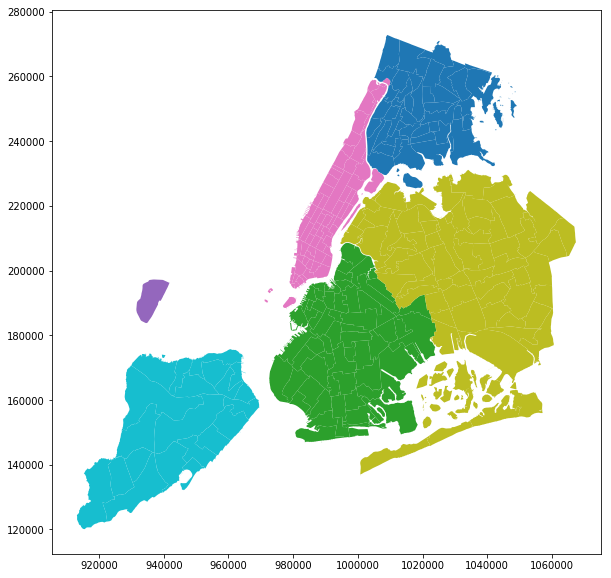

In [14]:
nyc_zones.plot(column="borough",figsize=(10,10))

In [15]:
# The Coordinate Reference System of the shapefile is epsg:2263, we have to transform back to epsg:4326
nyc_zones=nyc_zones.to_crs(crs={'init': 'epsg:4326'})
print(nyc_zones.crs)

{'init': 'epsg:4326'}


In [16]:
nyc_zones.head()

zone  LocationID        borough  \
0           Newark Airport           1            EWR   
1              Jamaica Bay           2         Queens   
2  Allerton/Pelham Gardens           3          Bronx   
3            Alphabet City           4      Manhattan   
4            Arden Heights           5  Staten Island   

                                            geometry  
0  POLYGON ((-74.18445299999996 40.69499599999989...  
1  (POLYGON ((-73.82337597260663 40.6389870471767...  
2  POLYGON ((-73.84792614099985 40.8713422339999,...  
3  POLYGON ((-73.97177410965318 40.72582128133705...  
4  POLYGON ((-74.17421738099989 40.56256808599987...

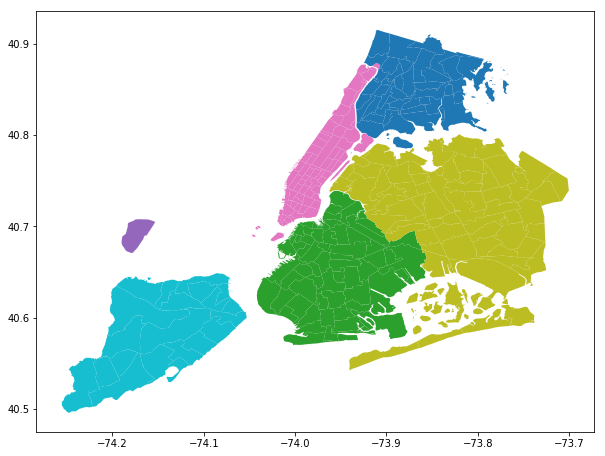

In [17]:
nyc_zones.plot(column="borough",figsize=(10,10))

In [18]:
# Now that the same coordinate reference system is used for the geodataframes and the shapefile, spatial joining can be performed to create the GeoDataFrame gdf.
#sjoin=Spatial Join, how=The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. 
#op=The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another.
#intersects=The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.

pickup_with_borough = (gpd.sjoin(pickup_gdf, nyc_zones, how="left", op='intersects')
    .drop(['Dropoff_Lon', 'Dropoff_Lat'],axis='columns'))

dropoff_with_borough = gpd.sjoin(dropoff_gdf[['Dropoff_Lon', 'Dropoff_Lat','geometry']],
    nyc_zones, how="left", op='intersects')

gdf = pickup_with_borough.join(dropoff_with_borough,lsuffix='_pickup',rsuffix='_dropoff')

#Drop some columns
gdf=gdf.drop(columns=['index_right_pickup','index_right_dropoff'])
#Could perhaps also drop the latitude and longitude coordinates as these are cointained within
#geometry_pickup and geometry_dropoff.
gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
0 2009-06-04 22:02:56 2009-06-04 22:11:56                2       2.099609   
1 2009-06-06 22:02:00 2009-06-06 22:30:00                1       4.078125   
2 2009-06-19 17:01:00 2009-06-19 17:09:00                3       0.799805   
3 2009-01-18 19:47:30 2009-01-18 19:53:35                2       2.199219   
4 2009-07-13 09:27:47 2009-07-13 09:39:49                1       1.299805   

   Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
0  -73.983757   40.743824           0   8.101562   
1  -73.976387   40.763893           0  16.093750   
2  -73.973450   40.763992           0   5.699219   
3  -73.956551   40.771511           0   7.398438   
4  -73.987587   40.770531           0   7.699219   

                                geometry_pickup          zone_pickup  \
0  POINT (-73.98375701904297 40.74382400512695)        Midtown South   
1  POINT (-73.97638702392578 40.76389312744141)        Midtown North   
2  POINT (-73.97344970703125 40.76399230957031)        Midtown North   
3  POINT (-73.95655059814453 40.77151107788086)      Lenox Hill West   
4  POINT (-73.98758697509766 40.77053070068359)  Lincoln Square West   

   LocationID_pickup borough_pickup  Dropoff_Lon  Dropoff_Lat  \
0              164.0      Manhattan   -73.962143    40.765209   
1              163.0      Manhattan   -74.003380    40.734158   
2              163.0      Manhattan   -73.982124    40.756065   
3              141.0      Manhattan   -73.976868    40.743328   
4              143.0      Manhattan   -73.982986    40.758152   

                               geometry_dropoff               zone_dropoff  \
0  POINT (-73.96214294433594 40.76520919799805)            Lenox Hill West   
1  POINT (-74.00337982177734 40.73415756225586)               West Village   
2  POINT (-73.98212432861328 40.75606536865234)             Midtown Center   
3  POINT (-73.97686767578125 40.74332809448242)                   Kips Bay   
4  POINT (-73.98298645019531 40.75815200805664)  Times Sq/Theatre District   

   LocationID_dropoff borough_dropoff  
0               141.0       Manhattan  
1               249.0       Manhattan  
2               161.0       Manhattan  
3               137.0       Manhattan  
4               230.0       Manhattan

#### Now we have a GeoDataframe with the Boroughs,Taxi Zones and Location ID's

In [19]:
gdf.shape

(1922813, 18)

In [20]:
gdf.dtypes

Pickup_DateTime       datetime64[ns]
Dropoff_DateTime      datetime64[ns]
Passenger_Count                uint8
Trip_Distance                float32
Pickup_Lon                   float32
Pickup_Lat                   float32
RateCodeID                     uint8
Fare_Amt                     float32
geometry_pickup               object
zone_pickup                   object
LocationID_pickup            float64
borough_pickup                object
Dropoff_Lon                  float32
Dropoff_Lat                  float32
geometry_dropoff              object
zone_dropoff                  object
LocationID_dropoff           float64
borough_dropoff               object
dtype: object

#### Look for NaN Values in Columns

In [21]:
gdf.isnull().sum()

Pickup_DateTime          0
Dropoff_DateTime         0
Passenger_Count          0
Trip_Distance            0
Pickup_Lon               0
Pickup_Lat               0
RateCodeID               0
Fare_Amt                 0
geometry_pickup          0
zone_pickup           3421
LocationID_pickup     3421
borough_pickup        3421
Dropoff_Lon              0
Dropoff_Lat              0
geometry_dropoff         0
zone_dropoff          5339
LocationID_dropoff    5339
borough_dropoff       5339
dtype: int64

#### Observation:
#### 1. Pickup Zones,Borough and Location ID's and Dropoff Zones,Borough and Location ID's have same Count of NaN Values

#### Borough,Zones and Location ID's of Pickup and Dropoffs have some NaN Values

#### Assumption: Data Points are out of Borough -> Datapoints=NaN

In [22]:
num_entries=len(gdf)
percent=(gdf["borough_pickup"].isnull().sum() / num_entries)*100
print(str(percent) + "%"+ " "+ "Pickups are out of Boroughs")

0.17791641724910326% Pickups are out of Boroughs


In [23]:
num_entries=len(gdf)
percent=(gdf["borough_dropoff"].isnull().sum() / num_entries)*100
print(str(percent) + "%"+ " "+ "Dropoffs are out of Boroughs")

0.27766610689651045% Dropoffs are out of Boroughs


#### Plotting those NaN Values of Boroughs Points

Text(0.5, 1.0, 'Taxi Pickups outside of Borough')

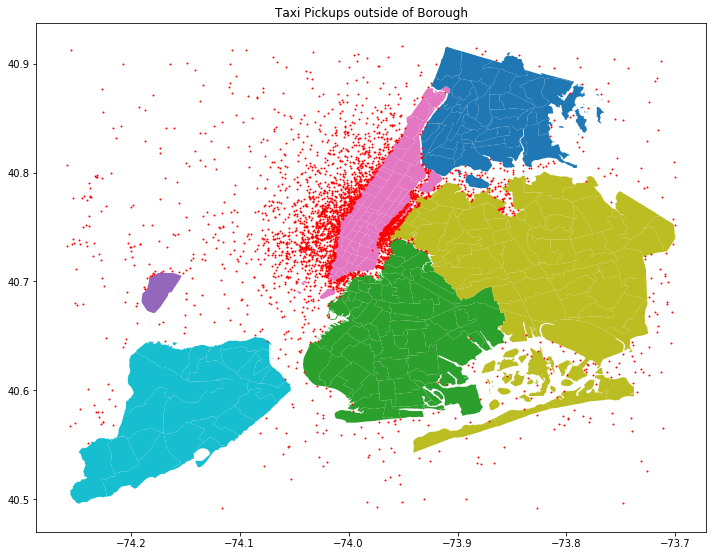

In [24]:
f,ax=plt.subplots(figsize=(12,12))
nyc_zones.plot(column='borough',ax=ax)
gdf.set_geometry('geometry_pickup')[gdf['borough_pickup'].isna()].plot(color='r', markersize=0.9,ax=ax)
plt.title('Taxi Pickups outside of Borough')

#### Observation: Many Pickup Locations are in the water or outside of the Boroughs of NYC
#### Conclusion: Drop those datapoints, because they are outside of New York City

Text(0.5, 1.0, 'Taxi Dropoffs outside of Borough')

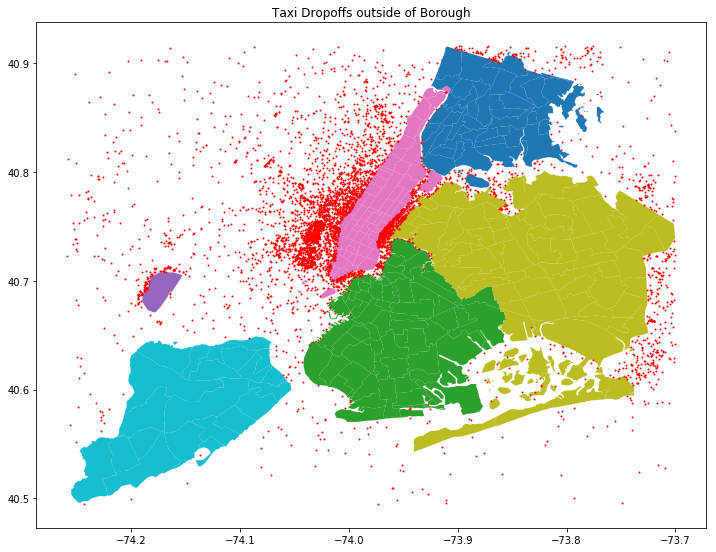

In [25]:
f,ax=plt.subplots(figsize=(12,12))
nyc_zones.plot(column='borough',ax=ax)
gdf.set_geometry('geometry_dropoff')[gdf['borough_dropoff'].isna()].plot(color='r', markersize=0.9,ax=ax)
plt.title('Taxi Dropoffs outside of Borough')

#### Observation: Also many Dropoff Locations are outside of Boroughs of New York City or in water
#### Conclusion: Drop those datapoints, because they are outside of New York City

In [26]:
gdf.loc[gdf["borough_pickup"].isna()]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
930     2009-03-21 03:27:01 2009-03-21 03:51:38                3   
1127    2009-10-23 23:23:00 2009-10-23 23:30:00                4   
1318    2009-09-03 11:44:00 2009-09-03 11:49:00                2   
1365    2009-10-30 20:14:00 2009-10-30 20:20:00                1   
1615    2009-12-10 10:49:00 2009-12-10 11:01:00                1   
2059    2009-09-12 16:20:00 2009-09-12 16:24:00                5   
2269    2009-06-17 09:04:00 2009-06-17 09:24:00                5   
2382    2009-05-10 10:54:24 2009-05-10 11:06:45                1   
2423    2009-11-18 17:09:00 2009-11-18 17:25:00                1   
2663    2009-07-23 22:15:00 2009-07-23 22:32:00                3   
3733    2009-11-16 10:26:00 2009-11-16 10:36:00                1   
3947    2009-09-13 18:28:00 2009-09-13 18:56:00                1   
4084    2009-11-08 02:20:00 2009-11-08 02:31:00                5   
4235    2009-04-15 15:48:00 2009-04-15 15:51:00                5   
4285    2009-04-24 09:06:00 2009-04-24 09:11:00                1   
4304    2009-09-06 00:54:00 2009-09-06 01:08:00                5   
4643    2009-07-20 20:08:00 2009-07-20 20:18:00                1   
5010    2009-11-06 13:21:00 2009-11-06 13:41:00                1   
5057    2009-04-18 10:11:00 2009-04-18 10:26:00                4   
5068    2009-12-13 02:49:00 2009-12-13 03:02:00                5   
5131    2009-08-17 12:05:32 2009-08-17 12:11:18                1   
5219    2009-02-17 00:53:00 2009-02-17 01:14:00                5   
5579    2009-09-04 23:22:00 2009-09-04 23:27:00                5   
5597    2009-06-14 02:09:45 2009-06-14 02:28:39                1   
5911    2009-08-22 22:31:00 2009-08-22 22:34:00                5   
5947    2009-02-25 14:59:00 2009-02-25 15:27:00                2   
6069    2009-11-26 11:10:00 2009-11-26 11:23:00                5   
6656    2009-12-18 03:50:00 2009-12-18 04:41:00                1   
6721    2009-11-18 11:03:00 2009-11-18 11:10:00                1   
6768    2009-12-01 22:34:00 2009-12-01 22:41:00                5   
...                     ...                 ...              ...   
1864387 2016-04-17 17:34:09 2016-04-17 17:49:30                4   
1864416 2016-06-06 12:47:01 2016-06-06 13:07:19                1   
1865869 2016-06-04 01:00:47 2016-06-04 01:14:12                2   
1867434 2016-02-04 16:54:09 2016-02-04 17:03:51                1   
1868365 2016-01-22 09:37:41 2016-01-22 09:40:29                5   
1870660 2016-01-15 21:59:16 2016-01-15 22:22:38                1   
1882282 2016-04-27 21:48:37 2016-04-27 22:02:29                1   
1886629 2016-01-15 12:39:31 2016-01-15 12:40:47                2   
1898429 2016-05-07 06:26:49 2016-05-07 06:35:48                2   
1900530 2016-03-29 20:53:03 2016-03-29 20:54:43                1   
1903850 2016-01-31 06:05:54 2016-01-31 06:07:56                1   
1906040 2016-03-18 11:20:33 2016-03-18 11:43:19                1   
1906796 2016-04-14 20:43:48 2016-04-14 20:55:45                1   
1908428 2016-01-02 23:59:26 2016-01-03 00:12:15                1   
1913386 2016-05-11 08:02:05 2016-05-11 08:12:51                2   
1916034 2016-05-21 11:48:25 2016-05-21 11:52:07                1   
1918182 2016-01-02 20:48:56 2016-01-02 20:49:27                1   
1941330 2016-04-02 09:04:52 2016-04-02 09:17:07                2   
1945940 2016-01-05 08:14:41 2016-01-05 08:16:36                5   
1948407 2016-05-14 12:28:10 2016-05-14 12:46:34                1   
1956299 2016-01-19 11:50:36 2016-01-19 12:07:51                3   
1957995 2016-02-01 20:20:16 2016-02-01 21:00:14                1   
1964907 2016-06-30 11:43:08 2016-06-30 12:04:58                2   
1967478 2016-01-31 02:35:22 2016-01-31 02:40:46                1   
1968095 2016-05-14 15:56:34 2016-05-14 16:25:47                1   
1977136 2016-01-11 12:14:21 2016-01-11 12:30:21                1   
1983205 2016-02-11 16:32:58 2016-02-11 17:13:44                2   


#### Drop Rows with NaN in Boroughs,Zones or Location ID's in Pickup and Dropoff

In [27]:
gdf.dropna(inplace=True)

In [28]:
gdf.shape

(1915832, 18)

In [29]:
gdf.describe()

Passenger_Count  Trip_Distance    Pickup_Lon    Pickup_Lat  \
count     1.915832e+06   1.915832e+06  1.915832e+06  1.915832e+06   
mean      1.687247e+00   2.914142e+00 -7.397531e+01  4.075091e+01   
std       1.309663e+00   3.924014e+01  3.451246e-02  2.674579e-02   
min       1.000000e+00   6.000519e-03 -7.423065e+01  4.051488e+01   
25%       1.000000e+00   1.040039e+00 -7.399223e+01  4.073675e+01   
50%       1.000000e+00   1.769531e+00 -7.398209e+01  4.075344e+01   
75%       2.000000e+00   3.199219e+00 -7.396838e+01  4.076765e+01   
max       6.000000e+00   4.499200e+04 -7.371025e+01  4.091128e+01   

         RateCodeID      Fare_Amt  LocationID_pickup   Dropoff_Lon  \
count  1.915832e+06  1.915832e+06       1.915832e+06  1.915832e+06   
mean   8.960968e-01  1.138768e+01       1.607228e+02 -7.397456e+01   
std    3.830549e-01  8.903463e+00       6.637132e+01  3.309852e-02   
min    0.000000e+00  2.900391e+00       1.000000e+00 -7.424289e+01   
25%    1.000000e+00  6.101562e+00       1.130000e+02 -7.399150e+01   
50%    1.000000e+00  8.500000e+00       1.610000e+02 -7.398052e+01   
75%    1.000000e+00  1.300000e+01       2.310000e+02 -7.396518e+01   
max    6.000000e+00  5.000000e+02       2.630000e+02 -7.370098e+01   

        Dropoff_Lat  LocationID_dropoff  
count  1.915832e+06        1.915832e+06  
mean   4.075137e+01        1.589840e+02  
std    3.064235e-02        6.929549e+01  
min    4.050939e+01        1.000000e+00  
25%    4.073568e+01        1.070000e+02  
50%    4.075397e+01        1.610000e+02  
75%    4.076854e+01        2.310000e+02  
max    4.091288e+01        2.630000e+02

In [30]:
gdf.dtypes

Pickup_DateTime       datetime64[ns]
Dropoff_DateTime      datetime64[ns]
Passenger_Count                uint8
Trip_Distance                float32
Pickup_Lon                   float32
Pickup_Lat                   float32
RateCodeID                     uint8
Fare_Amt                     float32
geometry_pickup               object
zone_pickup                   object
LocationID_pickup            float64
borough_pickup                object
Dropoff_Lon                  float32
Dropoff_Lat                  float32
geometry_dropoff              object
zone_dropoff                  object
LocationID_dropoff           float64
borough_dropoff               object
dtype: object

### How many Datapoints are still there?

In [31]:
origin_length=2000000
datapoints=(len(gdf)/origin_length)*100
print("There are still"+ " "+ str(datapoints)+" " + "%"+ " "+ "datapoints")

There are still 95.7916 % datapoints


### Convert GeoDataframe to Parquet for Bivariate Analysis

In [32]:
df=pd.DataFrame(gdf)

In [33]:
df.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
0 2009-06-04 22:02:56 2009-06-04 22:11:56                2       2.099609   
1 2009-06-06 22:02:00 2009-06-06 22:30:00                1       4.078125   
2 2009-06-19 17:01:00 2009-06-19 17:09:00                3       0.799805   
3 2009-01-18 19:47:30 2009-01-18 19:53:35                2       2.199219   
4 2009-07-13 09:27:47 2009-07-13 09:39:49                1       1.299805   

   Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
0  -73.983757   40.743824           0   8.101562   
1  -73.976387   40.763893           0  16.093750   
2  -73.973450   40.763992           0   5.699219   
3  -73.956551   40.771511           0   7.398438   
4  -73.987587   40.770531           0   7.699219   

                                geometry_pickup          zone_pickup  \
0  POINT (-73.98375701904297 40.74382400512695)        Midtown South   
1  POINT (-73.97638702392578 40.76389312744141)        Midtown North   
2  POINT (-73.97344970703125 40.76399230957031)        Midtown North   
3  POINT (-73.95655059814453 40.77151107788086)      Lenox Hill West   
4  POINT (-73.98758697509766 40.77053070068359)  Lincoln Square West   

   LocationID_pickup borough_pickup  Dropoff_Lon  Dropoff_Lat  \
0              164.0      Manhattan   -73.962143    40.765209   
1              163.0      Manhattan   -74.003380    40.734158   
2              163.0      Manhattan   -73.982124    40.756065   
3              141.0      Manhattan   -73.976868    40.743328   
4              143.0      Manhattan   -73.982986    40.758152   

                               geometry_dropoff               zone_dropoff  \
0  POINT (-73.96214294433594 40.76520919799805)            Lenox Hill West   
1  POINT (-74.00337982177734 40.73415756225586)               West Village   
2  POINT (-73.98212432861328 40.75606536865234)             Midtown Center   
3  POINT (-73.97686767578125 40.74332809448242)                   Kips Bay   
4  POINT (-73.98298645019531 40.75815200805664)  Times Sq/Theatre District   

   LocationID_dropoff borough_dropoff  
0               141.0       Manhattan  
1               249.0       Manhattan  
2               161.0       Manhattan  
3               137.0       Manhattan  
4               230.0       Manhattan

In [34]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/5_Dataset_for_Exploration"
df.astype({'geometry_pickup': str,'zone_pickup': str,'LocationID_pickup': np.uint16,'borough_pickup': str,'geometry_dropoff': str,'zone_dropoff': str,'LocationID_dropoff': np.uint16,'borough_dropoff': str}).to_parquet(os.path.join(path, "Exploration_Tripdata_for_Bivariate" + "." + "parquet"),engine="fastparquet")